# MLP Data Analysis

## Varying Models. Two Layers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ZX-MLP-VaryingHiddenNodes-Results-v2.csv')

In [2]:
def f2(precision,recall):
    return (5* precision * recall)/((4*precision) + recall )

In [3]:
df['f2'] = df.apply(lambda x: f2(x['precision'],x['recall']), axis=1)

/opt/anaconda3/envs/cs3244/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [4]:
df.sort_values(by=['f2'], ascending=False)

,x,y,accuracy,balanced_accuracy,precision,recall,f1,f2,roc_auc,cm00,cm01,cm10,cm11
529,14,13,0.798189,0.734367,0.167804,0.662544,0.267785,0.416782,0.734367,30944,7439,764,1500
445,16,11,0.768962,0.742168,0.155734,0.712014,0.255569,0.415314,0.742168,29644,8739,652,1612
682,38,16,0.739636,0.750332,0.146632,0.762367,0.245957,0.414366,0.750332,28338,10045,538,1726
978,33,23,0.747903,0.747227,0.148728,0.746466,0.248037,0.413830,0.747227,28710,9673,574,1690
454,25,11,0.750658,0.745569,0.149274,0.739841,0.248424,0.413030,0.745569,28837,9546,589,1675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,3,43,0.944301,0.500000,0.000000,0.000000,0.000000,NaN,0.500000,38383,0,2264,0
1809,4,43,0.944301,0.500000,0.000000,0.000000,0.000000,NaN,0.500000,38383,0,2264,0
1813,8,43,0.944301,0.500000,0.000000,0.000000,0.000000,NaN,0.500000,38383,0,2264,0
1814,9,43,0.944276,0.499987,0.000000,0.000000,0.000000,NaN,0.499987,38382,1,2264,0


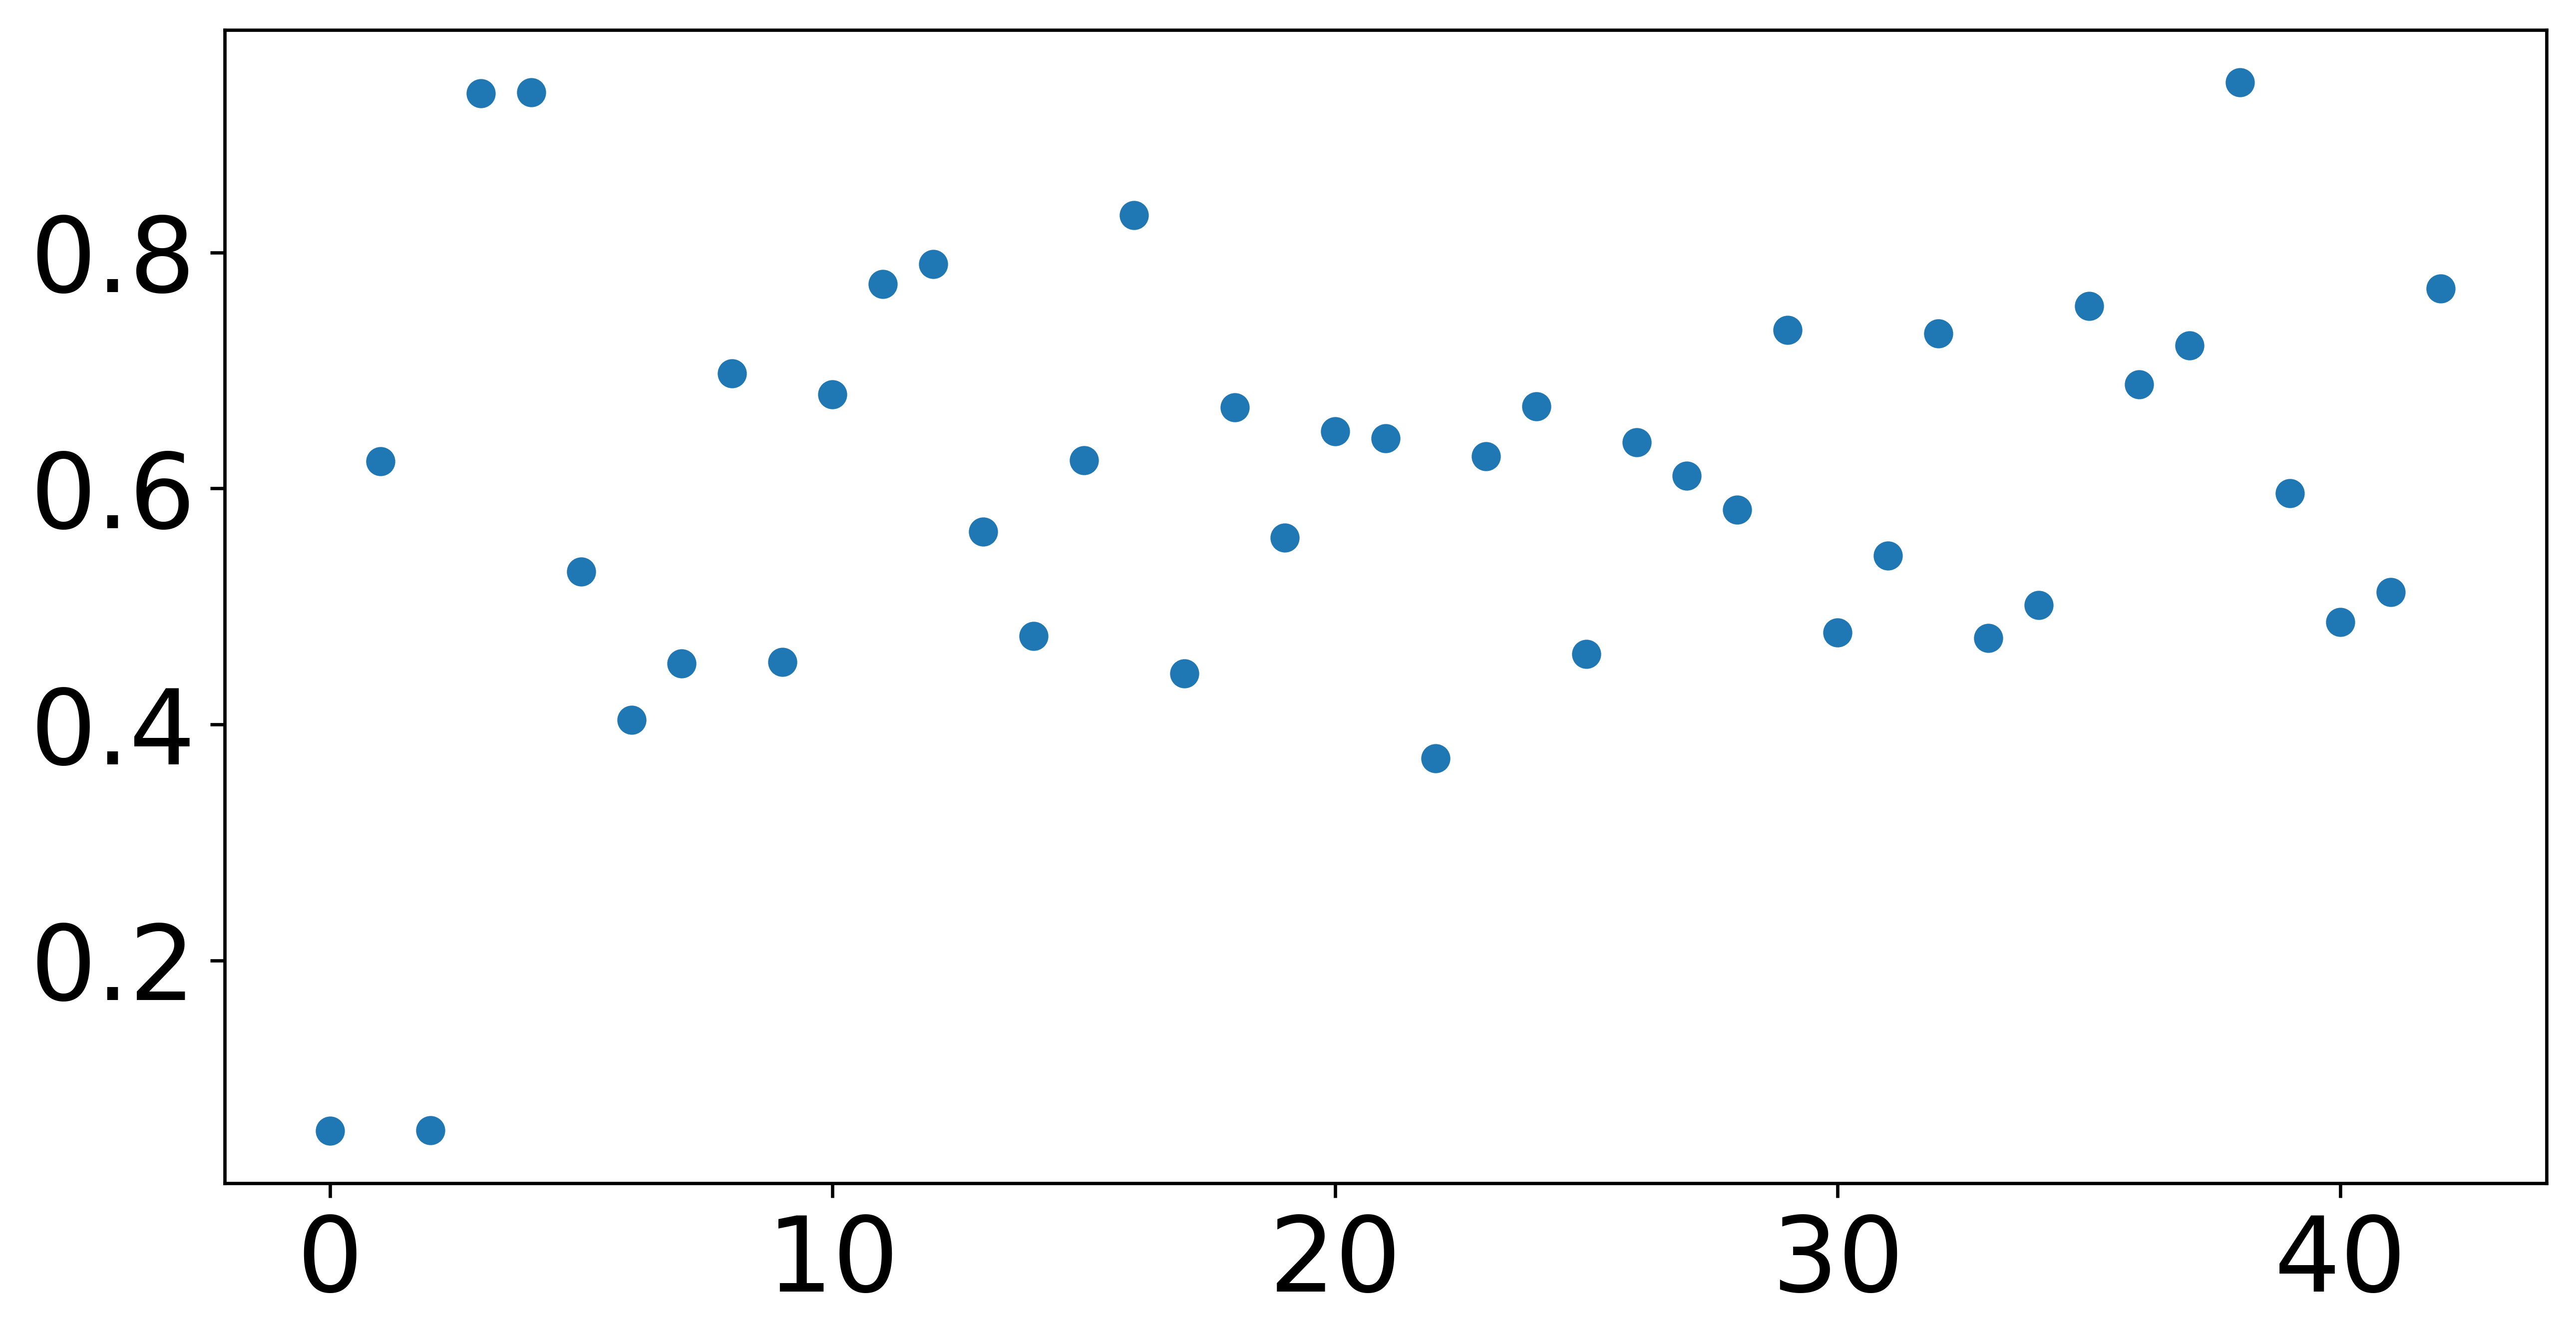

In [5]:
TEST = df.loc[df['x'] == df['y']][['x','y','accuracy']].to_numpy()
ydata = TEST[:,2]


plt.figure(figsize=(10, 5),dpi=600) # Set plot area
plt.rcParams.update({'font.size': 25})

plt.scatter(range(len(TEST)), ydata)
plt.show()


In [6]:
ACCURACY_LIST = df[['x','y','f2']].to_numpy()
ACCURACY_MAT = np.zeros((43, 43))

for x , y, accuracy in ACCURACY_LIST:
    ACCURACY_MAT[int(y)-1,int(x)-1] = accuracy

ACCURACY_MAT

array([[0.22775285, 0.00055206, 0.22775285, ..., 0.22776202,        nan,
               nan],
       [       nan, 0.36352041, 0.22776202, ..., 0.22765683, 0.39650131,
        0.22775285],
       [0.22758829,        nan, 0.22769348, ..., 0.22767974, 0.29937235,
        0.227666  ],
       ...,
       [       nan, 0.227666  , 0.22768432, ..., 0.3088748 , 0.36725427,
        0.29756197],
       [0.22757913, 0.302055  , 0.00055206, ..., 0.3136489 , 0.31207888,
        0.38300361],
       [       nan,        nan,        nan, ..., 0.35117057, 0.31041626,
        0.38268113]])

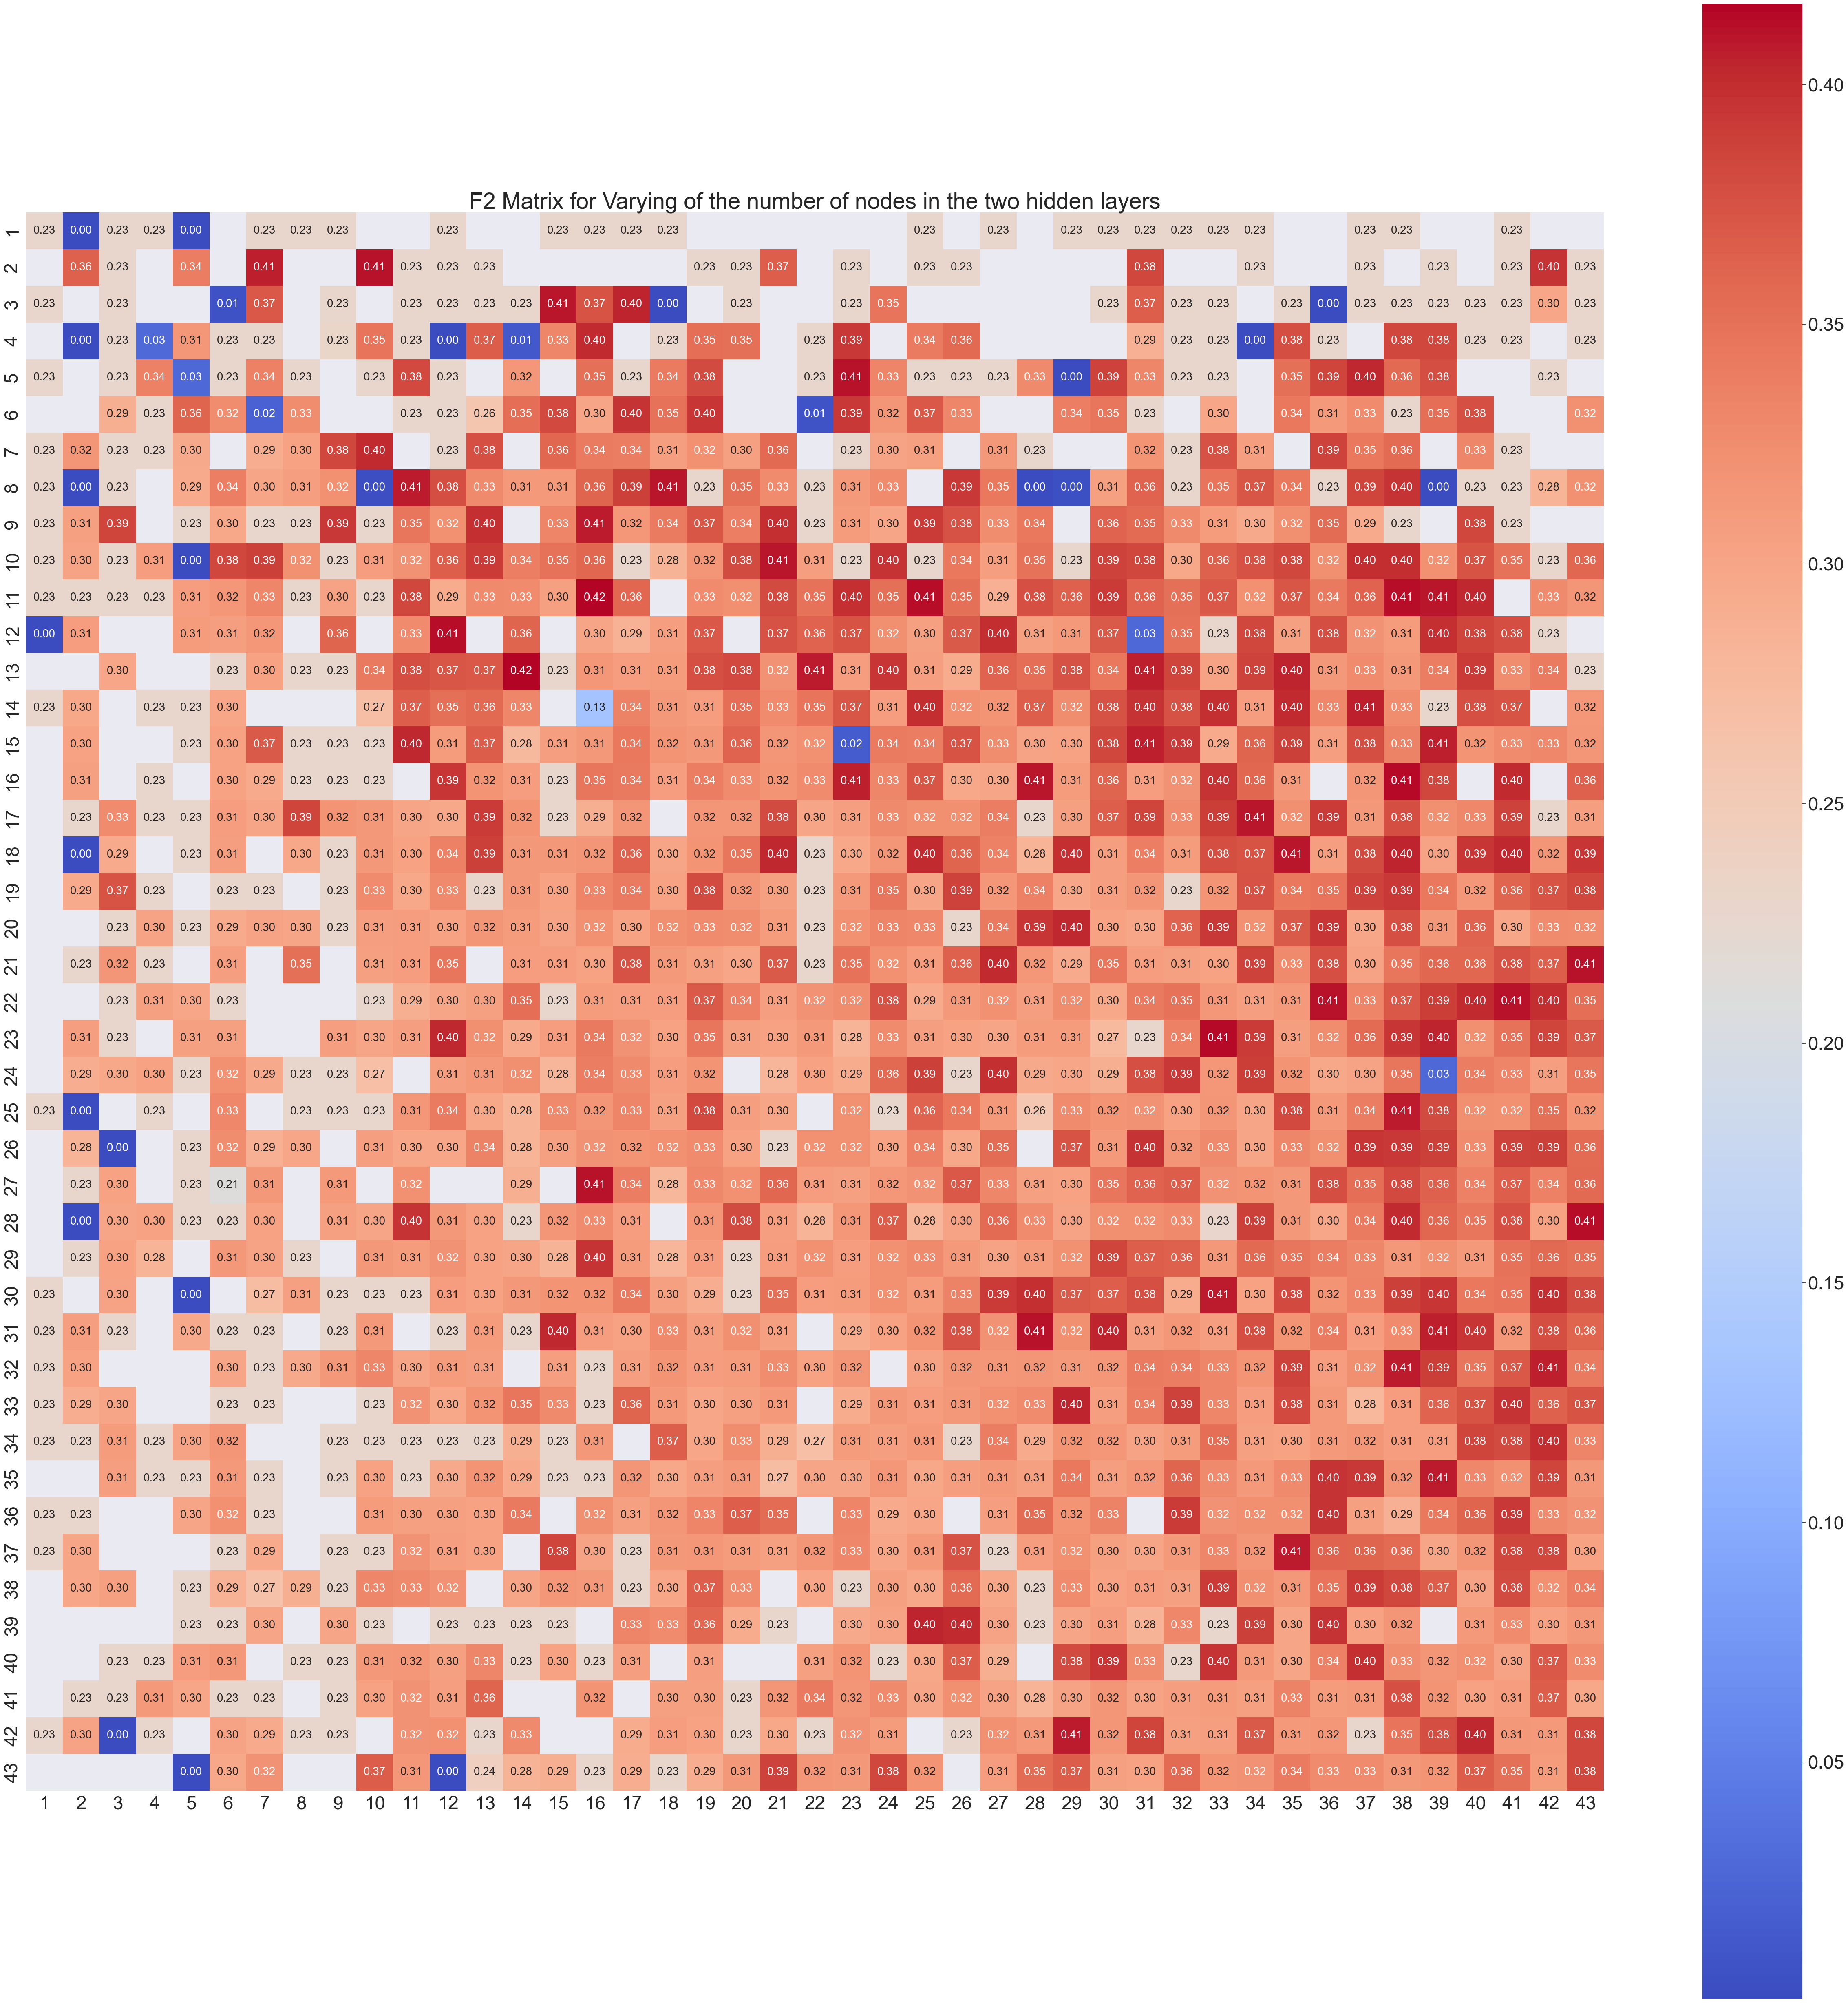

In [7]:
plt.figure(figsize=(50,50))
sns.set(font_scale=3)
cols = [x for x in range(1,44)]
hm = sns.heatmap(ACCURACY_MAT,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 20},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('F2 Matrix for Varying of the number of nodes in the two hidden layers', size = 40)
plt.tight_layout()

In [8]:
ACCURACY_LIST = df[['x','y','accuracy']].to_numpy()
ACCURACY_MAT = np.zeros((43, 43))

for x , y, accuracy in ACCURACY_LIST:
    ACCURACY_MAT[int(y)-1,int(x)-1] = accuracy

ACCURACY_MAT

array([[0.05569907, 0.94432553, 0.05569907, ..., 0.05574827, 0.94430093,
        0.94430093],
       [0.94407951, 0.62314562, 0.05574827, ..., 0.05567447, 0.75648879,
        0.05569907],
       [0.05579748, 0.94430093, 0.05587128, ..., 0.05579748, 0.42527124,
        0.05572367],
       ...,
       [0.94430093, 0.05572367, 0.05582208, ..., 0.48680099, 0.61704431,
        0.4212365 ],
       [0.05574827, 0.45137403, 0.94432553, ..., 0.51164908, 0.51201811,
        0.73956258],
       [0.94430093, 0.94430093, 0.94430093, ..., 0.58540606, 0.50141462,
        0.76935567]])